In [7]:
from utils import BaselineClassifier, evaluate, nn_accuracy, run
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from tqdm.notebook import tqdm
import os

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
results = []

In [11]:
ns = [5000, 10000, 30000, 50000, 100000]

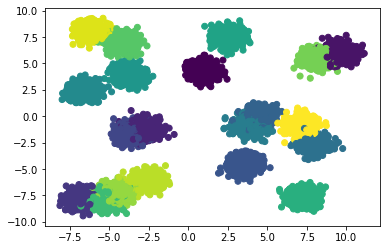

In [12]:
X_show, y_show = make_blobs(n_samples=10000, n_features=20, centers=20, cluster_std=0.5, shuffle=True, random_state=0)
plt.scatter(X_show[:, 0], X_show[:, 1], c=y_show)
plt.savefig('figures/clustered_example.png')

In [ ]:
for n in tqdm(ns):
    for seed in tqdm(range(5)):
        results = []
        k = int(n/1000)
        result, _ = run(n_samples=n, n_features=20, n_clusters=20, cluster_std=0.5, k=k, n_test=100, random_seed=0)
        results.append(result)
        hdr = False  if os.path.isfile('samples_clusters_new.csv') else True
        pd.DataFrame(results).to_csv(f'samples_clusters_new.csv', mode='a', header=hdr)